Ejercicio 1: Los siguientes datos fueron colectados en 22 compañías públicas de EU en 1975. Estandarizar las variables. Ajustar modelos k-means para 4 y 5 clústers. Reportar: tamaño de cada clúster, empresas en cada clúster, distancias entre centroides y proporción de variación explicada. Comparar la calidad de la partición (dentro vs. entre clústers). Puedes comentar cuál de los dos K “separa mejor” (ratio más grande) y si esa mejora justifica pasar de 4 a 5 clústers. Busca el “codo” de la curva y comenta si K=4 o K=5 son valores razonables. Interpretar los clústers: ¿qué variables parecen distinguir más los grupos? ¿qué tipo de empresas se agrupan juntas (por tamaño, porcentaje nuclear, ventas, etc.)?

In [46]:
library(ggplot2)
library(factoextra)

Warning message:
"package 'ggplot2' was built under R version 4.4.3"
Warning message:
"package 'factoextra' was built under R version 4.4.3"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [ ]:
utilities <- data.frame(
  ID = 1:22,
  Company = c(
    "Arizona Public Service",
    "Boston Edison Co.",
    "Central Louisiana Electric Co.",
    "Commonwealth Edison Co.",
    "Consolidated Edison Co. (N.Y.)",
    "Florida Power & Light Co.",
    "Hawaiian Electric Co.",
    "Idaho Power Co.",
    "Kentucky Utilities Co.",
    "Madison Gas & Electric Co.",
    "Nevada Power Co.",
    "New England Electric Co.",
    "Northern States Power Co.",
    "Oklahoma Gas & Electric Co.",
    "Pacific Gas & Electric Co.",
    "Puget Sound Power & Light Co.",
    "San Diego Gas & Electric Co.",
    "The Southern Co.",
    "Texas Utilities Co.",
    "Wisconsin Electric Power Co.",
    "United Illuminating Co.",
    "Virginia Electric & Power Co."
  ),
  X1 = c(1.06, 0.89, 1.43, 1.02, 1.49, 1.32, 1.22, 1.10, 1.34, 1.12,
         0.75, 1.13, 1.15, 1.09, 0.96, 1.16, 0.76, 1.05, 1.16, 1.20,
         1.04, 1.07),
  X2 = c(9.2, 10.3, 15.4, 11.2, 8.8, 13.5, 12.2, 9.2, 13.0, 12.4,
         7.5, 10.9, 12.7, 12.0, 7.6, 9.9, 6.4, 12.6, 11.7, 11.8,
         8.6, 9.3),
  X3 = c(151, 202, 113, 168, 192, 111, 175, 245, 168, 197,
         173, 178, 199, 96, 164, 252, 136, 150, 104, 148,
         204, 174),
  X4 = c(54.4, 57.9, 53.0, 56.0, 51.2, 60.0, 67.6, 57.0, 60.4, 53.0,
         51.5, 62.0, 53.7, 49.8, 62.2, 56.0, 61.9, 56.7, 54.0, 59.9,
         61.0, 54.3),
  X5 = c(1.6, 2.2, 3.4, 0.3, 1.0, -2.2, 2.2, 3.3, 7.2, 2.7,
         6.5, 3.7, 6.4, 1.4, -0.1, 9.2, 9.0, 2.7, -2.1, 3.5,
         3.5, 5.9),
  X6 = c(9077, 5088, 9212, 6423, 3300, 11127, 7642, 13082, 8406, 6455,
         17441, 6154, 7179, 9673, 6468, 15991, 5714, 10140, 13507, 7287,
         6650, 10093),
  X7 = c(0.0, 25.3, 0.0, 34.3, 15.6, 22.5, 0.0, 0.0, 0.0, 39.2,
         0.0, 0.0, 50.2, 0.0, 0.9, 0.0, 8.3, 0.0, 0.0, 41.1,
         0.0, 26.6),
  X8 = c(0.628, 1.555, 1.058, 0.700, 2.044, 1.241, 1.652, 0.309, 0.862, 0.623,
         0.768, 1.897, 0.527, 0.588, 1.400, 0.620, 1.920, 1.108, 0.636, 0.702,
         2.116, 1.306)
)
df <- data.frame(
    scale(utilities[3:10])
    # ,row.names = utilities[2]
)

df

X1,X2,X3,X4,X5,X6,X7,X8
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.29315791,-0.68463896,-0.417122002,-0.57771516,-0.52622751,0.04590290,-0.7146294,-0.85367545
-1.21451134,-0.19445367,0.821002037,0.20683629,-0.33381191,-1.07776413,0.7920476,0.81329670
1.71214073,2.07822360,-1.339645796,-0.89153574,0.05101929,0.08393124,-0.7146294,-0.08043055
-0.50994695,0.20660702,-0.004413989,-0.21906307,-0.94312798,-0.70170610,1.3280197,-0.72420189
2.03732429,-0.86288816,0.578232617,-1.29501935,-0.71864311,-1.58142837,0.2143888,1.69263800
1.11597086,1.23153991,-1.388199680,0.67756716,-1.74485965,0.62337028,0.6253007,0.24864810
0.57399826,0.65223002,0.165524604,2.38116460,-0.33381191,-0.35832428,-0.7146294,0.98772637
-0.07636887,-0.68463896,1.864910540,0.00509449,0.01895002,1.17407698,-0.7146294,-1.42731528
1.22436538,1.00872841,-0.004413989,0.76723019,1.26965142,-0.14311204,-0.7146294,-0.43288637


[1] 8

In [95]:
set.seed(8013)

kmeans_4 <- kmeans(df, centers = 4, nstart = 20)
kmeans_5 <- kmeans(df, centers = 5, nstart = 20)

Para determinar el óptimo de clusters se tiene que determinar en qué valor el decremento de WSS empiece a ser mínimo o insignificante. Esto ocurre a partir de 5 clusters, debido a que aún existe un salto notorio en el valor del WSS cuando pasa de 4 a 5 clusters, pero de 5 a 6 clusters el salto no es grande. Por lo tanto, se hace uso de 5 clusters

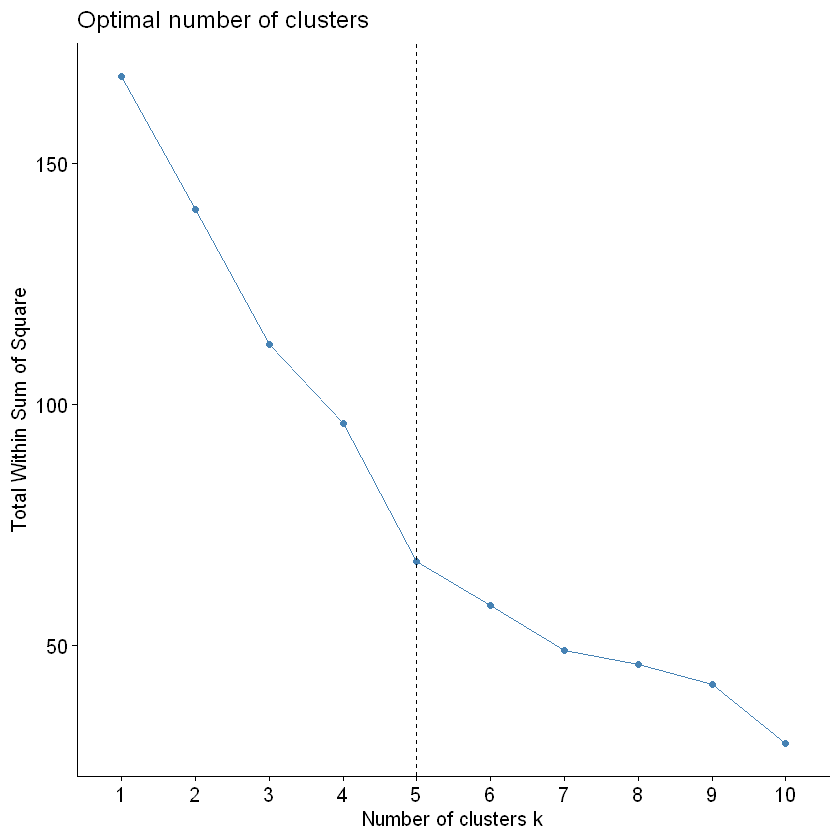

In [60]:
fviz_nbclust(df, kmeans, method = "wss") + 
geom_vline(xintercept = 5, linetype = 2)

In [75]:
print(kmeans_4$withinss)
print(kmeans_4$betweenss)

[1] 26.507769 10.177094  9.533522 34.164812
[1] 87.6168


In [76]:
print(kmeans_5$withinss)
print(kmeans_5$betweenss)

[1] 21.187976 26.507769 10.177094  9.533522  0.000000
[1] 100.5936


Too few points to calculate an ellipse


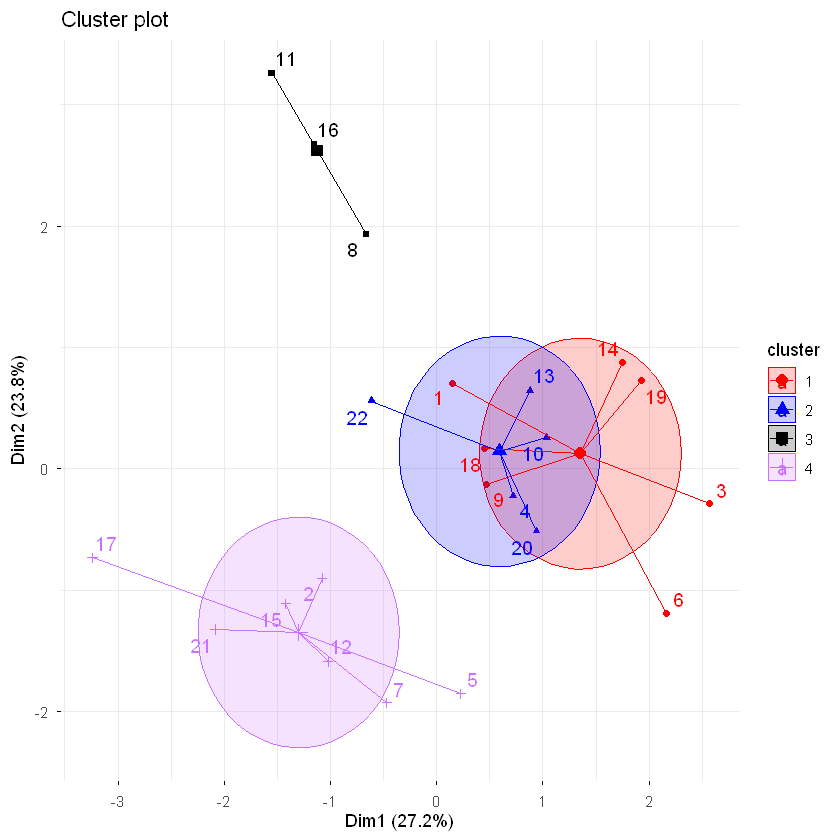

In [77]:
fviz_cluster(kmeans_4, data = df,
             palette = c("#FF0000", "#0000FF", "#000000", "#C870FF"),
             ellipse.type = "euclid",
             star.plot = TRUE,
             repel = TRUE,
             ggtheme = theme_minimal())

Too few points to calculate an ellipse
Too few points to calculate an ellipse


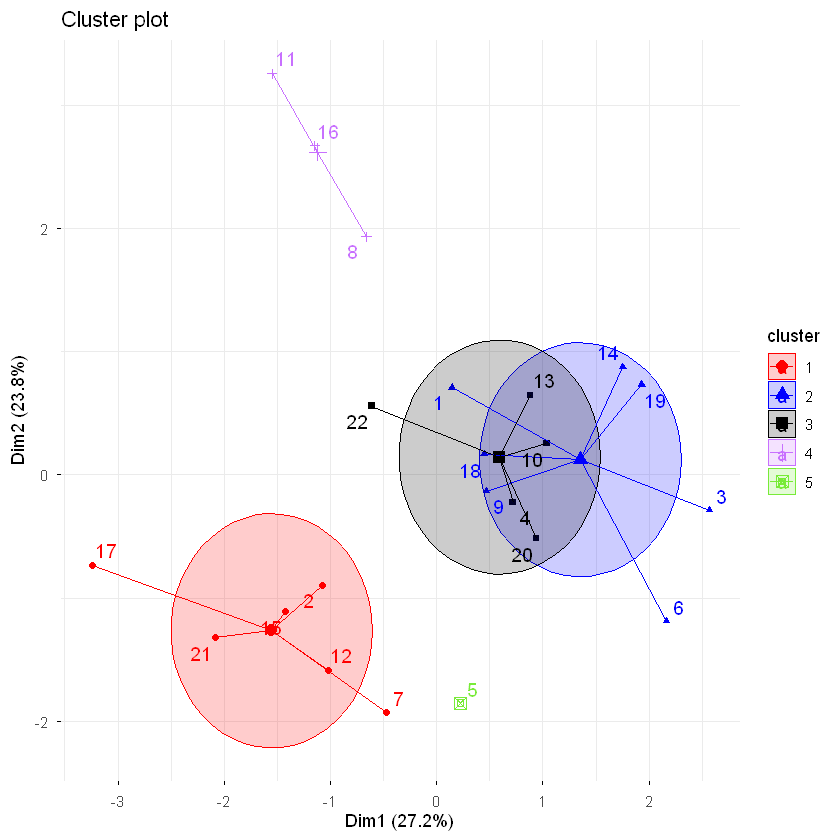

In [78]:
fviz_cluster(kmeans_5, data = df,
             palette = c("#FF0000", "#0000FF", "#000000", "#C870FF","#78EB38"),
             ellipse.type = "euclid",
             star.plot = TRUE,
             repel = TRUE,
             ggtheme = theme_minimal())

In [84]:
kmeans_4

K-means clustering with 4 clusters of sizes 7, 5, 3, 7

Cluster means:
           X1         X2         X3         X4          X5         X6
1  0.50431607  0.7795509 -0.9858961 -0.3375463 -0.48957692  0.3518600
2 -0.01133215  0.3313815  0.2189339 -0.3580408  0.16646865 -0.4018738
3 -0.60027572 -0.8331800  1.3389101 -0.4805802  0.99171778  1.8565214
4 -0.23896065 -0.6591748  0.2556961  0.7992527 -0.05435116 -0.8604593
          X7         X8
1 -0.5232108 -0.4105368
2  1.5650384 -0.5954476
3 -0.7146294 -0.9657660
4 -0.2884040  1.2497562

Clustering vector:
 [1] 1 4 1 2 4 1 4 3 1 2 3 4 2 1 4 3 4 1 1 2 4 2

Within cluster sum of squares by cluster:
[1] 26.507769 10.177094  9.533522 34.164812
 (between_SS / total_SS =  52.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [85]:
kmeans_5

K-means clustering with 5 clusters of sizes 6, 7, 5, 3, 1

Cluster means:
           X1         X2         X3         X4          X5         X6
1 -0.61834147 -0.6252226  0.2019400  1.1482980  0.05636417 -0.7402978
2  0.50431607  0.7795509 -0.9858961 -0.3375463 -0.48957692  0.3518600
3 -0.01133215  0.3313815  0.2189339 -0.3580408  0.16646865 -0.4018738
4 -0.60027572 -0.8331800  1.3389101 -0.4805802  0.99171778  1.8565214
5  2.03732429 -0.8628882  0.5782326 -1.2950193 -0.71864311 -1.5814284
          X7         X8
1 -0.3722028  1.1759426
2 -0.5232108 -0.4105368
3  1.5650384 -0.5954476
4 -0.7146294 -0.9657660
5  0.2143888  1.6926380

Clustering vector:
 [1] 2 1 2 3 5 2 1 4 2 3 4 1 3 2 1 4 1 2 2 3 1 3

Within cluster sum of squares by cluster:
[1] 21.187976 26.507769 10.177094  9.533522  0.000000
 (between_SS / total_SS =  59.9 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault" 

Al usar 5 clusters se puede observar que se forma un cluster de tamaño 1, esto debido a que el punto que pertenece a ese cluster es un dato atípico esto derivado de las métricas de SS en los clusters hace un salto cuando se quita esa observación atípica de los clusters y forma clusters más compactos (por lo tanto, observaciones más parecidas entre sí). 

Too few points to calculate an ellipse
Too few points to calculate an ellipse


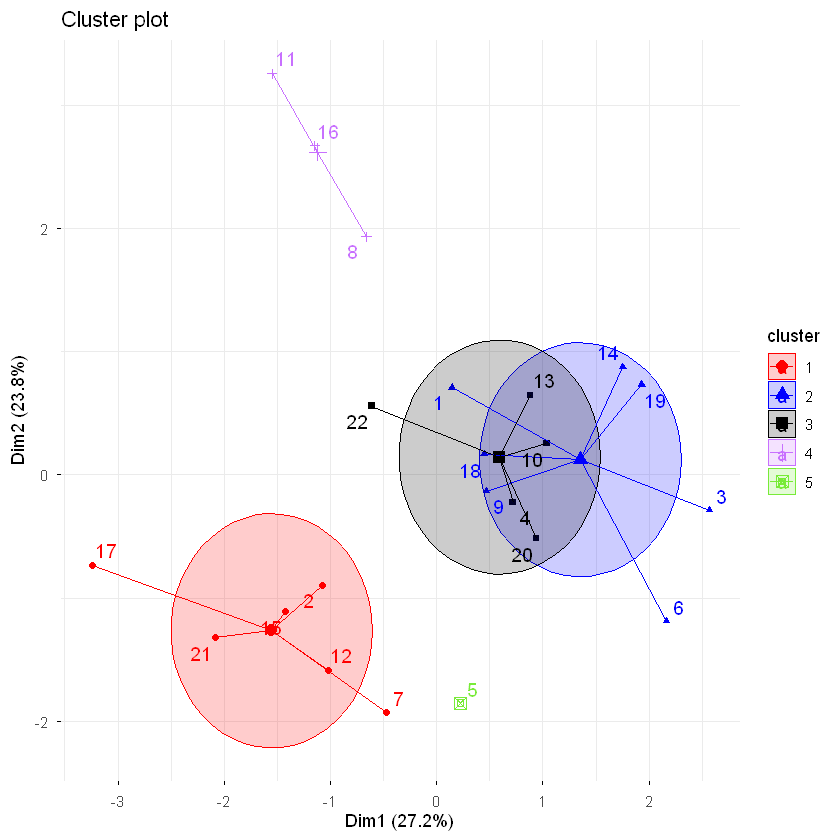

In [86]:
fviz_cluster(kmeans_5, data = df,
             palette = c("#FF0000", "#0000FF", "#000000", "#C870FF","#78EB38"),
             ellipse.type = "euclid",
             star.plot = TRUE,
             repel = TRUE,
             ggtheme = theme_minimal())

In [88]:
kmeans_5$centers

,X1,X2,X3,X4,X5,X6,X7,X8
1,-0.61834147,-0.6252226,0.2019400,1.1482980,0.05636417,-0.7402978,-0.3722028,1.1759426
2,0.50431607,0.7795509,-0.9858961,-0.3375463,-0.48957692,0.3518600,-0.5232108,-0.4105368
3,-0.01133215,0.3313815,0.2189339,-0.3580408,0.16646865,-0.4018738,1.5650384,-0.5954476
4,-0.60027572,-0.8331800,1.3389101,-0.4805802,0.99171778,1.8565214,-0.7146294,-0.9657660
5,2.03732429,-0.8628882,0.5782326,-1.2950193,-0.71864311,-1.5814284,0.2143888,1.6926380


In [ ]:
(kmeans_5$cluster == 5)

[1] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE